In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/preprocessed_rapido_dataset.csv')

In [5]:
df.head()

,booking_id,day_of_week,is_weekend,hour_of_day,city,pickup_location,drop_location,vehicle_type,ride_distance_km,estimated_ride_time_min,...,avg_surge_multiplier,demand_level,peak_hour_flag,fare_per_km,fare_per_min,long_distance_flag,city_pair,driver_reliability_score,customer_loyalty_score,booking_datetime
0,B_000001,Thursday,0,0,Mumbai,Loc_19,Loc_16,Bike,7.01,46.30,...,1.52,Low,0,21.14,3.20,0,Loc_19_Loc_16,92.44,82.20,2025-12-11 00:07:00
1,B_000002,Monday,0,6,Mumbai,Loc_32,Loc_38,Cab,9.67,43.54,...,1.58,Low,0,48.17,10.70,0,Loc_32_Loc_38,87.14,98.80,2025-07-07 06:13:00
2,B_000003,Saturday,1,8,Chennai,Loc_28,Loc_1,Auto,16.18,48.55,...,1.69,Medium,1,28.25,9.41,0,Loc_28_Loc_1,84.22,46.47,2025-08-23 08:53:00
3,B_000004,Saturday,1,10,Delhi,Loc_16,Loc_30,Bike,1.02,4.61,...,1.57,Low,1,50.03,11.07,0,Loc_16_Loc_30,82.00,75.71,2025-04-12 10:25:00
4,B_000005,Saturday,1,0,Hyderabad,Loc_22,Loc_31,Bike,12.35,55.56,...,1.40,Medium,0,11.72,2.60,0,Loc_22_Loc_31,87.43,89.91,2025-08-23 00:08:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   booking_id                100000 non-null  object 
 1   day_of_week               100000 non-null  object 
 2   is_weekend                100000 non-null  int64  
 3   hour_of_day               100000 non-null  int64  
 4   city                      100000 non-null  object 
 5   pickup_location           100000 non-null  object 
 6   drop_location             100000 non-null  object 
 7   vehicle_type              100000 non-null  object 
 8   ride_distance_km          100000 non-null  float64
 9   estimated_ride_time_min   100000 non-null  float64
 10  actual_ride_time_min      100000 non-null  float64
 11  traffic_level             100000 non-null  object 
 12  weather_condition         100000 non-null  object 
 13  base_fare                 100000 non-null  fl

# Exploratory Data Analysis
1. Ride volume by hour, weekday, city
2. Cancellation heatmap across cities
3. Distance vs Fare correlation
4. Rating Distribution
5. Customer vs Driver behaviour comparison
6. payment method usage patterns
7. Traffic/Weather vs Cancellation

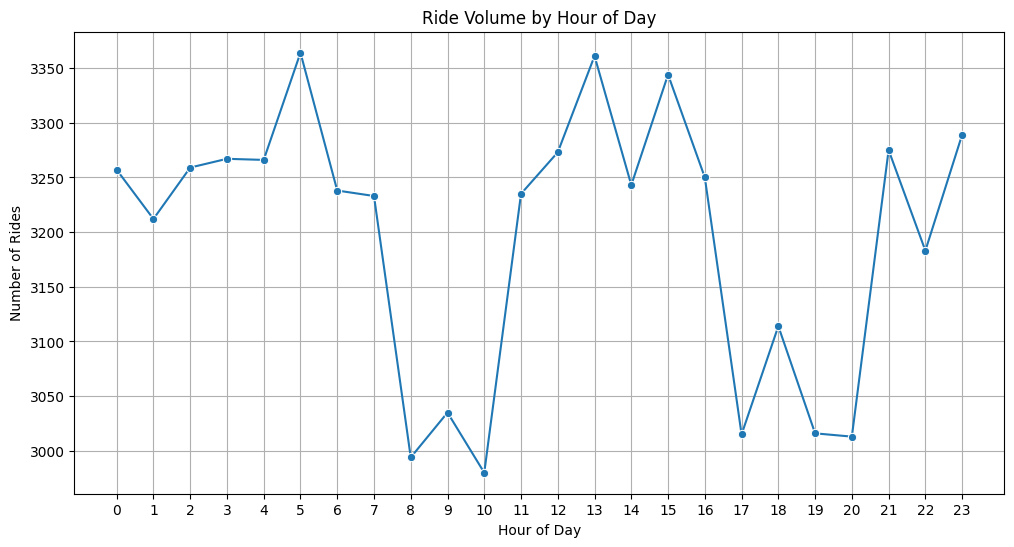

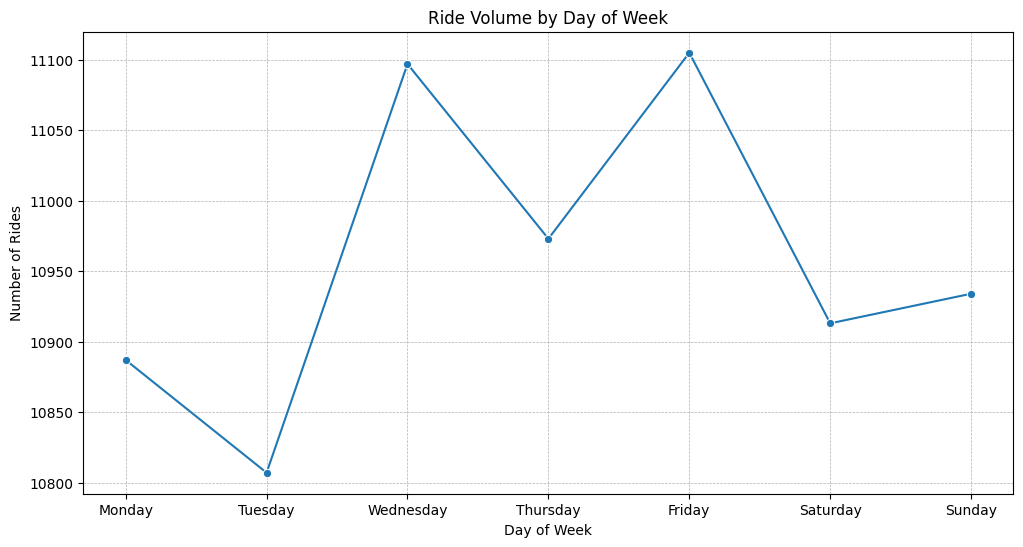

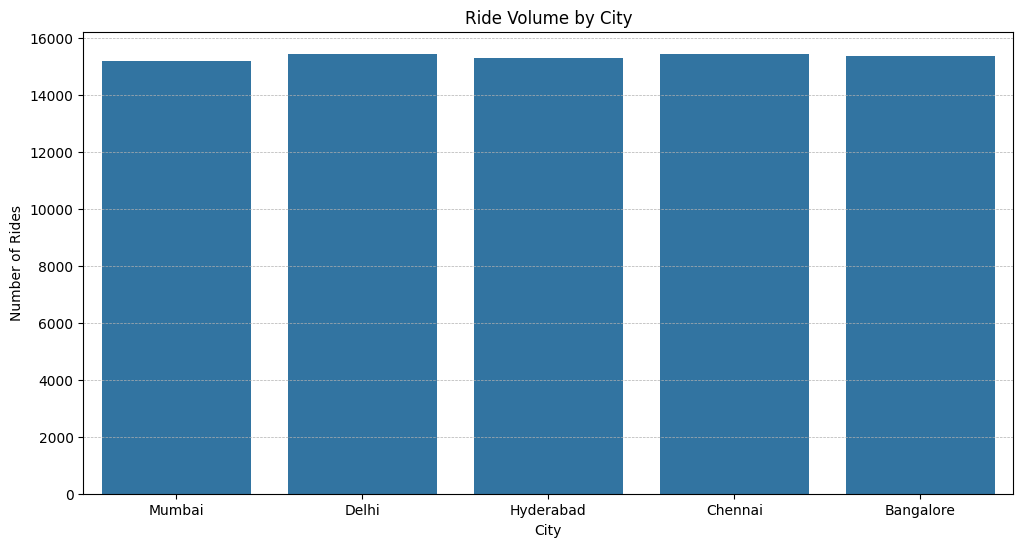

In [24]:
# 1. Ride Volume Analysis
# Line Plot to see the ride volume trend over the day 
df_uncancelled = df[df['booking_status'] != 'Cancelled']
df_hour_of_day = df_uncancelled.groupby('hour_of_day').size().sort_index().reset_index(name='ride_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='ride_count', data=df_hour_of_day, marker ='o')
plt.title('Ride Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))  # Set x-ticks to show each hour
plt.grid()
plt.show()


# To see the ride volume by day of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_day_of_week = df_uncancelled.groupby('day_of_week').size().reindex(weekday_order).reset_index(name='ride_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x ='day_of_week', y='ride_count', data=df_day_of_week, marker='o')
#sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.show()

# Plotting ride volume by city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df_uncancelled)
plt.title('Ride Volume by City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# Analysis

1. Ride volume is at peak on the 5,13,15th hours of the day, low at 8,9,10,17,19,20 hours.
2. Ride volume is high on Wednesday, Friday and the least on Monday,Tuesday
3. Ride volume is roughly the same across all the major cities (Mumbai, Chennai, Delhi, Hyderabad and Bangalore)

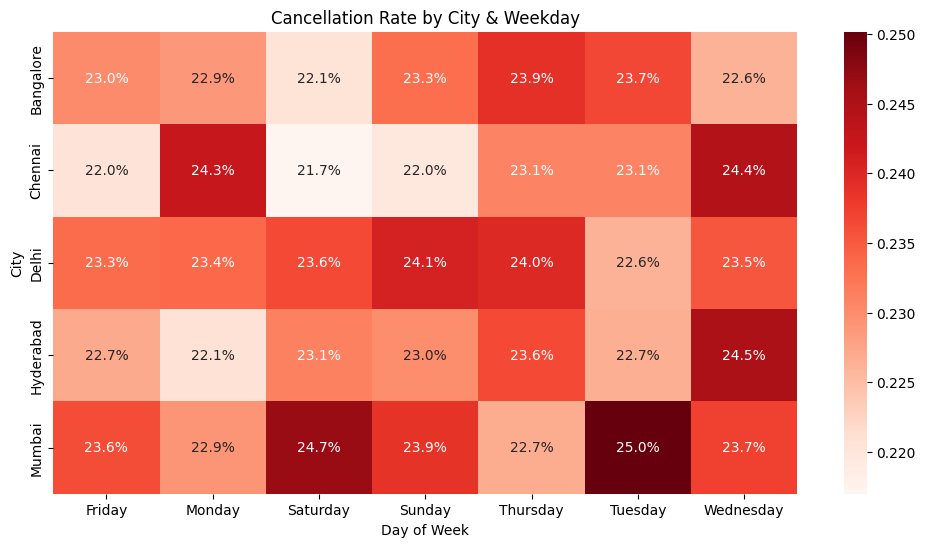

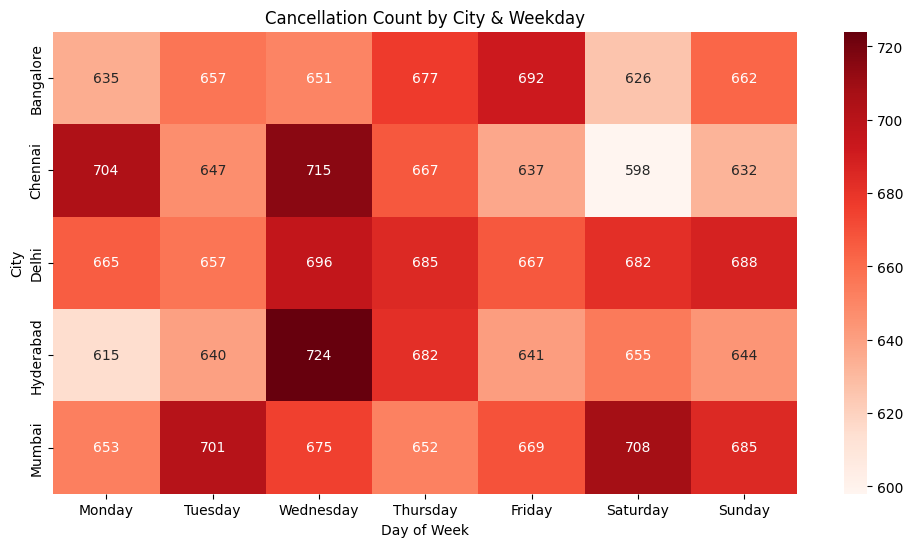

In [ ]:
# 2. Cancellation heatmap across cities using pivot table and heat map to visualize the cancellation patterns across different cities and days of the week.

cancelled_df = df[df['booking_status'] == 'Cancelled']

# Plotting cancellation count by city using heatmap
pivot = cancelled_df.pivot_table(
    index='city',                # y-axis
    columns='day_of_week',       # x-axis
    aggfunc='size', fill_value=0
)

total_pivot = df.pivot_table(
    index='city',
    columns='day_of_week',
    aggfunc='size', fill_value=0
)
cancellation_rate = pivot / total_pivot

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot = pivot.reindex(columns=weekday_order)

# Cancellation rate heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cancellation_rate, annot=True, fmt=".1%", cmap='Reds')
plt.xlabel('Day of Week')
plt.ylabel('City')
plt.title('Cancellation Rate by City & Weekday')
plt.show()

# Cancellation count heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap='Reds')
plt.xlabel('Day of Week')
plt.ylabel('City')
plt.title('Cancellation Count by City & Weekday')
plt.show()

# Analysis:

1. Mumbai has the highest cancellation rate at 25% on Tuesdays, among all days and cities.
2. Cancellation count is highest on Wednesday at Hyderabad, although the rate is 24.4% slightly lower than the highest.
3. Looking from the heatmap, Mumbai and Delhi seems to have high cancellation rates compared to other cities.
4. Chennai has lower cancellation rates on most days.

Correlation: 0.668


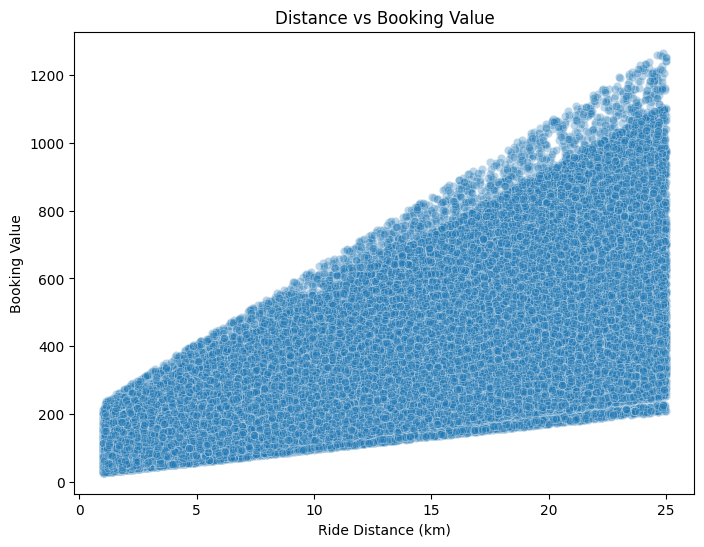

In [ ]:
# 3. Distance vs Fare correlation

corr_value = df['ride_distance_km'].corr(df['booking_value'])
print("Correlation:", round(corr_value, 3))
# Positive correlation indicates that longer rides tend to have higher booking values.

# Scatter plot to visualize the relationship between ride distance and booking value.
plt.figure(figsize=(8,6))
sns.scatterplot(x='ride_distance_km', y='booking_value', data=df, alpha=0.3)
plt.title('Distance vs Booking Value')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.show()

# Analysis

Distance and fare/booking_value have a positive correlation

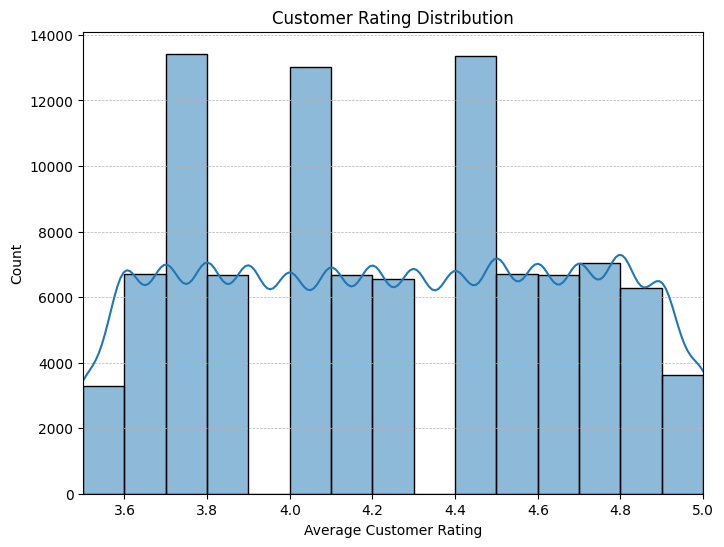

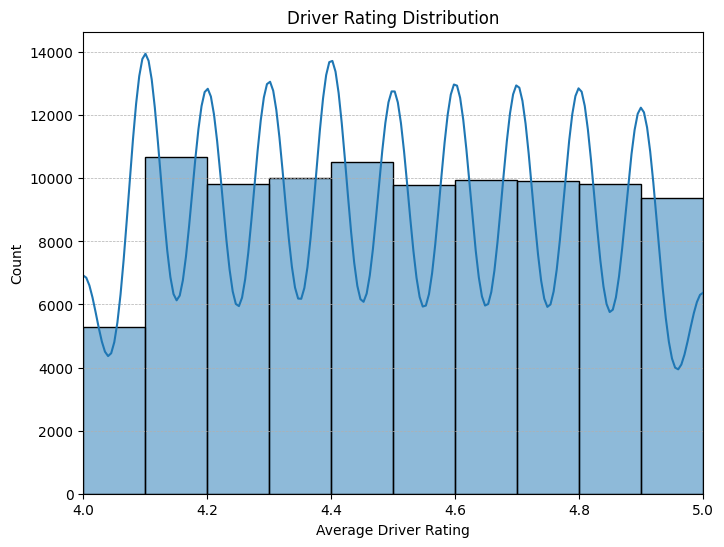

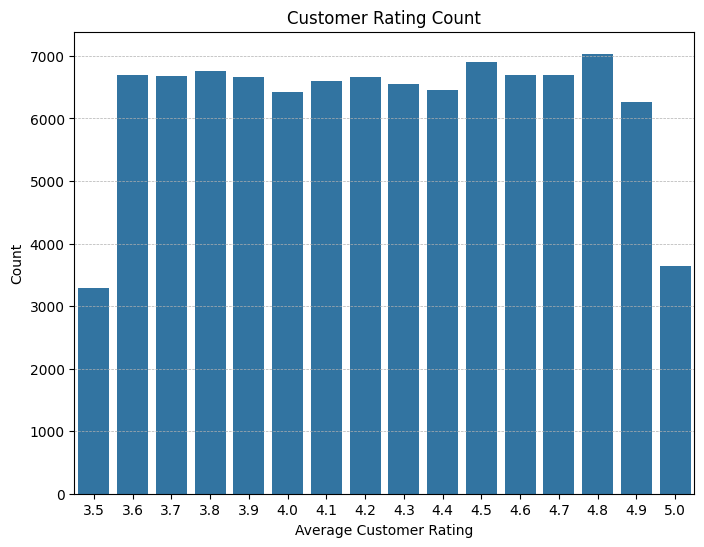

In [44]:
# Rating distribution 
# Univariate analysis of customer and driver ratings to understand the distribution of ratings using histograms and count plots.

plt.figure(figsize=(8,6))
list_of_bins = np.arange(df['avg_customer_rating'].min(), df['avg_customer_rating'].max() + 0.1, 0.1)
sns.histplot(df['avg_customer_rating'], bins=list_of_bins, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Average Customer Rating')
plt.ylabel('Count')
plt.xlim(df['avg_customer_rating'].min(), df['avg_customer_rating'].max())
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

plt.figure(figsize=(8,6))
list_of_bins = np.arange(df['avg_driver_rating'].min(), df['avg_driver_rating'].max() + 0.1, 0.1)
sns.histplot(df['avg_driver_rating'], bins=list_of_bins, kde=True)
plt.title('Driver Rating Distribution')
plt.xlabel('Average Driver Rating')
plt.xlim(df['avg_driver_rating'].min(), df['avg_driver_rating'].max())
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


plt.figure(figsize=(8,6))
sns.countplot(x='avg_customer_rating', data=df)
plt.title('Customer Rating Count')
plt.xlabel('Average Customer Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# Analysis

Average Driver rating is high, between 4-5 which is extremely good.
Customer rating ranges from 3.5 to 5, which is still okay, not very poor.

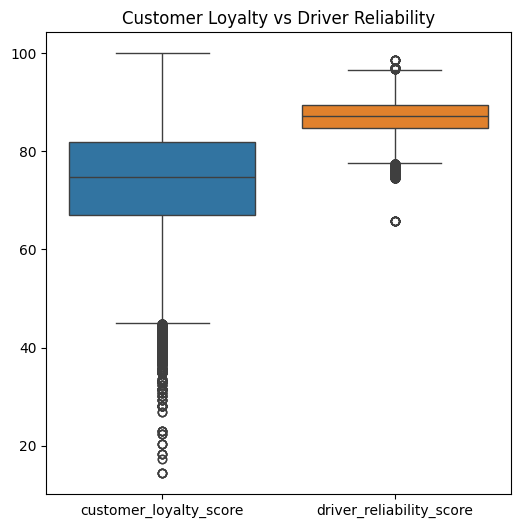

In [ ]:
# 5. Customer vs Driver behaviour comparison
# Box plot to compare the distribution of customer loyalty scores and driver reliability scores to identify any differences in behavior between customers and drivers.
plt.figure(figsize=(6,6))
sns.boxplot(data=df[['customer_loyalty_score','driver_reliability_score']])
plt.title('Customer Loyalty vs Driver Reliability')
plt.show()

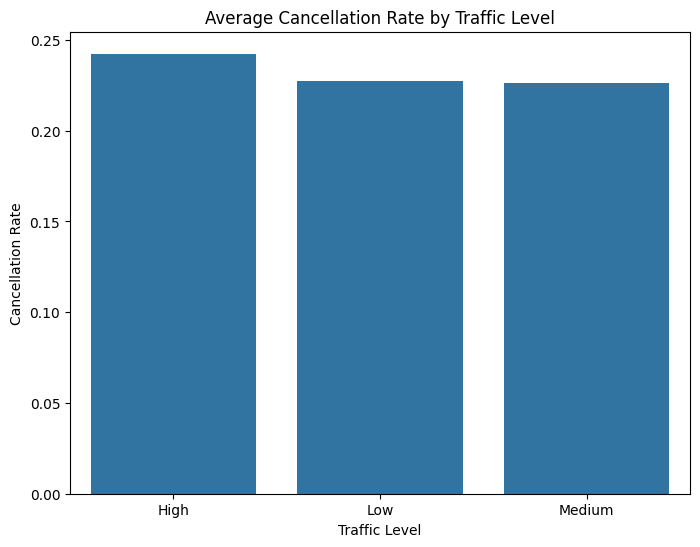

In [ ]:
# 7. Traffic level vs Cancellation
traffic_cancel = df.groupby('traffic_level')['cancellation_rate'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='traffic_level', y='cancellation_rate', data=traffic_cancel)
plt.title('Average Cancellation Rate by Traffic Level')
plt.ylabel('Cancellation Rate')
plt.xlabel('Traffic Level')
plt.show()

# Analysis

Cancellation rate is slightly higher when the traffic is high. It does play some role, but not much